# 深層の探検ツアー
東工大 D3 梶山 青春 @ 鼎研究室
<div align="center">
    <img width='1500' src="src/madeinabyss.jpg">
<div>

# データの読み込み

In [1]:
import numpy as np
import numpy.ma as ma

npz = np.load('data/inputdata.npz')
x_train, y_train, x_val, y_val = npz["x_train"], npz["y_train"], npz["x_val"], npz["y_val"]
print(f'x_train: {x_train.shape}',
      f'y_train: {y_train.shape}',
      f'x_val: {x_val.shape}',
      f'y_val: {y_val.shape}'
     )
x_train_masked = ma.masked_where(x_train>9999, x_train)
x_val_masked = ma.masked_where(x_val>9999, x_val)

x_train: (1000, 24, 72, 3) y_train: (1000,) x_val: (100, 24, 72, 3) y_val: (100,)


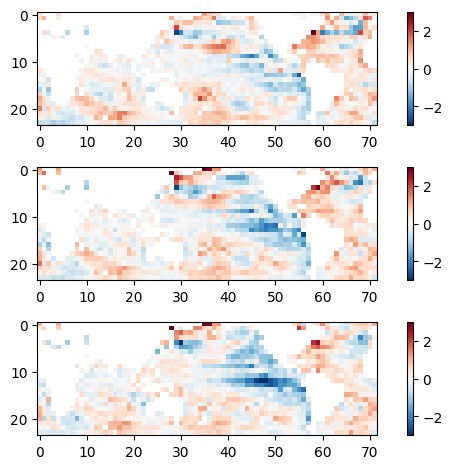

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, axes = plt.subplots(3, 1, tight_layout=True)
for i in range(3):
    img = axes[i].imshow(x_train_masked[0,:,:,i], cmap='RdBu_r', norm = colors.Normalize(vmin=-3, vmax=3))
    plt.colorbar(img, ax=axes[i])

# Convolutional Neural Network 

|  項目 |  値  |
| ---- | ---- |
|  入力データ  | 海面水温偏差3か月 |
| 出力データ   | タイ北部月平均降水量 |
|  予測月   |  8月平均雨量  |
|  予測リードタイム | 1か月予測 |
|  解像度　|  5°x 5°(24x72グリッド) |
|  訓練データ数  |  1000  |
|  検証データ数　|  100   |

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(30, (4,8), activation='tanh', input_shape=(24, 72, 3), padding='SAME'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(30, (2,4), activation='tanh', padding='SAME'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(30, (2,4), activation='tanh', padding='SAME'))
    model.add(layers.Flatten())
    model.add(layers.Dense(30, activation='tanh'))
    model.add(layers.Dense(1, activation='linear'))

    optimizer = tf.keras.optimizers.RMSprop(0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

2022-11-24 12:16:46.012874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 12:16:46.277318: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-24 12:16:46.283193: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 12:16:46.283218: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [4]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 72, 30)        2910      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 36, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 36, 30)        7230      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 18, 30)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 18, 30)         7230      
                                                                 
 flatten (Flatten)           (None, 3240)              0

2022-11-24 12:16:48.615697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-24 12:16:48.615750: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 12:16:48.615774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6a357af352d6): /proc/driver/nvidia/version does not exist
2022-11-24 12:16:48.616117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<div align="center">
    <img width='1000' src="src/cnn.png">
<div>

# 訓練と予測結果

In [5]:
history = model.fit(x_train_masked, y_train,
                    epochs=10, batch_size=200, verbose=2)
model.save_weights('ckpt/weights.h5')

Epoch 1/10
5/5 - 1s - loss: 1.2166 - mae: 0.8700 - 1s/epoch - 225ms/step
Epoch 2/10
5/5 - 0s - loss: 0.7167 - mae: 0.6315 - 468ms/epoch - 94ms/step
Epoch 3/10
5/5 - 0s - loss: 0.6187 - mae: 0.5876 - 446ms/epoch - 89ms/step
Epoch 4/10
5/5 - 0s - loss: 0.6859 - mae: 0.6231 - 465ms/epoch - 93ms/step
Epoch 5/10
5/5 - 0s - loss: 0.5095 - mae: 0.5326 - 458ms/epoch - 92ms/step
Epoch 6/10
5/5 - 0s - loss: 0.5019 - mae: 0.5127 - 454ms/epoch - 91ms/step
Epoch 7/10
5/5 - 1s - loss: 0.5606 - mae: 0.5691 - 539ms/epoch - 108ms/step
Epoch 8/10
5/5 - 1s - loss: 0.4219 - mae: 0.4637 - 504ms/epoch - 101ms/step
Epoch 9/10
5/5 - 1s - loss: 0.5460 - mae: 0.5489 - 529ms/epoch - 106ms/step
Epoch 10/10
5/5 - 1s - loss: 0.4940 - mae: 0.5176 - 511ms/epoch - 102ms/step


4/4 [==============================] - 0s 8ms/step


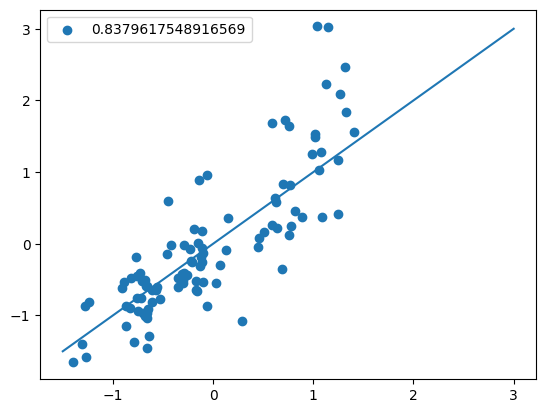

In [6]:
pred_val = model.predict(x_val_masked)
plt.scatter(pred_val, y_val, label=f'{np.corrcoef(pred_val[:,0], y_val)[0,1]}')
plt.plot(np.linspace(-1.5,3),np.linspace(-1.5,3))
plt.legend()

# ブラックボックス問題
<div align="center">
    <img width='1000' src="src/chainsawman.png">
<div>

<div align="center">
    <img width='1000' src="src/suzumenotogimari.png">
<div>

# Grad-CAMのすすめ

In [7]:
from keras.applications.vgg16 import (VGG16, preprocess_input, decode_predictions)
from tensorflow.keras.preprocessing import image
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

def normalize(x):
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def image_preprocessing(x_val, index):
    img = x_val[index]
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    x = ma.masked_where(x>999, x)
    return x

In [8]:
import keras.backend as K
import cv2

def grad_cam(input_model, image, y_val, layer_name):
    # ----1. 予測のLossを計算---
    pred_val = input_model.output[0]
    y_val = tf.convert_to_tensor(y_val.astype(np.float32))
    loss = K.mean(K.square(pred_val - y_val))
    conv_output = input_model.get_layer(layer_name).output
    # ---2. 予測クラスのLossから最後のconv層への勾配を計算---
    grads = normalize(K.gradients(loss, conv_output)[0])
    output, grads_val = K.function([input_model.layers[0].input], [conv_output, grads])([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    # ---3. 最後のconv層チャンネルごとに勾配の平均を計算して，各チャンネルの重要度とする
    weights = np.mean(grads_val, axis = (0,1))
    # ---4. 最後のconv層の順伝搬の出力にチャンネルごとの重みをかけて，足し合わせる---
    cam = np.dot(output, weights)
    cam = cv2.resize(cam, (72, 24), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    heatmap = (cam - np.min(cam)) / (np.max(cam) - np. min(cam))
    return np.uint8(cam), heatmap

# Grad-CAMの例

In [17]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

def show(heatmap):
    proj = ccrs.PlateCarree(central_longitude=180)
    img_extent= (-180, 180, -55, 65)
    
    fig = plt.figure()
    ax = plt.subplot(projection=proj)
    ax.coastlines(resolution='50m', lw=0.5)
    ax.gridlines(xlocs = mticker.MultipleLocator(90),
                 ylocs = mticker.MultipleLocator(45),
                 linestyle = '-',
                 color = 'gray')
    mat = ax.matshow(heatmap,
                     cmap = 'BuPu',
                     extent = img_extent,
                     transform=proj)
    cbar = fig.colorbar(mat,
                        ax=ax,
                        orientation='horizontal')

In [10]:
model_grads = build_model()
model_grads.load_weights('ckpt/weights.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 72, 30)        2910      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 36, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 36, 30)        7230      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 18, 30)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 18, 30)         7230      
                                                                 
 flatten_1 (Flatten)         (None, 3240)             

2022-11-24 12:16:57.041021: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-11-24 12:16:57.061065: W tensorflow/c/c_api.cc:291] Operation '{name:'count/Assign' id:145 op device:{requested: '', assigned: ''} def:{{{node count/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count, count/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2022-11-24 12:21:43.510062: W tensorflow/c/c_api.cc:291] Operation '{name:'conv2d_5/Tanh' id:76 op device:{requested: '', assigned: ''} def:{{{node conv2d_5/Tanh}} = Tanh[T=DT_FLOAT, _has_manual_control_dependencies=true](conv2d_5/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


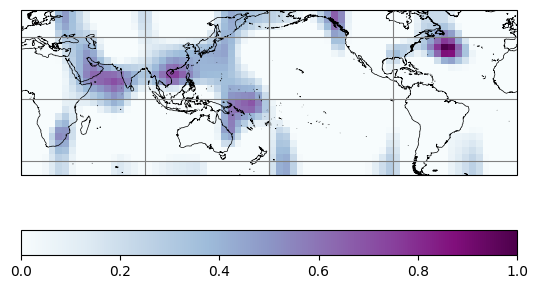

In [40]:
preprocessed_input = image_preprocessing(x_val_masked, index=23)
predictions = model_grads.predict(preprocessed_input)
cam, heatmap = grad_cam(model_grads, preprocessed_input, y_val, "conv2d_5")
show(heatmap)